<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/Enginerring_using_keras_Functional_API_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/keras_functional.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Last amended: 17th Nov, 2022
# Ref: Hands-On Machine Learningwith Scikit-Learn, Keras, and TensorFlow by Aurelien Geron
#      Page: 308-312
#
#####################################
# Engineering with NN architecture
# Using keras functional API 
#####################################

# Functional Models
See this [an excellent article](https://keras.io/guides/functional_api/) on Functional Modeling<br><br>
The Keras functional API is a way to create models that are more flexible than the Sequential API. The functional API can handle models with non-linear sequence, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a graph  of layers. So the functional API is a way to build graphs of layers.

## Call libraries


In [4]:
# 1.0 Import libraries
import pandas as pd
import numpy as np
import os

# 1.0.1 sklearn related
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# 1.1 Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers
#from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [5]:
# 1.2 Display multiple outputs from a Cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Mount gdrive

In [7]:
# 1.3 Mount google drive as /gdrive
#     directly under root:

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Read Data

In [8]:
# 2.0 Path to folder having the data file:
pathToFolder = "/gdrive/MyDrive/Colab_data_files/big_data_mart/"


In [9]:
# 2.1 Read Data now:
datafile = "bigdatamart_train_corrected.csv"
data = pd.read_csv(pathToFolder + datafile)

In [10]:
# 2.2
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Preprocess data

In [11]:
# 3.0 Fill in missing values:

data.isnull().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

In [12]:
# 3.1 By median and by mode:

data['item_weight'] = data['item_weight'].fillna(value = data['item_weight'].median())
data['outlet_size'] = data['outlet_size'].fillna(value = 'Small')

In [13]:
# 3.2 Check again:

data.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

In [14]:
# 4.0 Transform cat to integers:
#     First get value counts and unique values:

data['item_fat_content'].value_counts()
print("\n=====")
data['outlet_size'].value_counts()
print("\n====")
data['outlet_type'].value_counts()
print("\n=====")
data['outlet_location_type'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: item_fat_content, dtype: int64


=====


Small     4798
Medium    2793
High       932
Name: outlet_size, dtype: int64


====


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: outlet_type, dtype: int64


=====


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: outlet_location_type, dtype: int64

In [15]:
# 4.1 Now map text to integers in various columns:

data['item_fat_content'] = data['item_fat_content'].map(
                                                         {"Low Fat" : 0, "low fat" : 0, "Regular": 1}
                                                        )

# 4.2
data['outlet_size'] = data['outlet_size'].map(
                                               {"Medium" : 1, "Small" : 0, "High" : 2}
                                              )

# 4.3
data['outlet_type'] = data['outlet_type'].map(
                                              {'Supermarket Type1': 0, 'Supermarket Type2' : 1, 'Supermarket Type3' : 2, 'Grocery Store' : 3}
                                              )

# 4.4
data['outlet_location_type'] = data['outlet_location_type'].map(
                                                                 {'Tier 1' : 0, 'Tier 2': 1, "Tier 3": 2}
                                                                )

In [16]:
# 4.5 Check?
data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,0,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,1,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,0,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,2,3,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,2,2,0,994.7052


In [17]:
# 5.0 Drop two columns:

data.drop(columns = ['item_type', 'outlet_identifier'], inplace = True)

In [18]:
# 6.0 Label encode 'item_identifier':
#     It has very large number of unique levels/text values:

le = LabelEncoder()
data['item_identifier'] = le.fit_transform(data['item_identifier'])

In [19]:
# 6.1 Seperate target (y), 'item_identifier', and rest (X):

y = data.pop('item_outlet_sales')   # Target
X1 = data.pop('item_identifier')    # cat feature
X = data                            # Rest of data (numeric data)

In [20]:
# 6.2
X.shape
X1.shape
y.shape

(8523, 8)

(8523,)

(8523,)

In [21]:
# 6.3:

X.head(2)
print("\n====")
X1.head(2)
print("\n====")
y.head(2)

,item_weight,item_fat_content,item_visibility,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,9.30,0,0.016047,249.8092,1999,1,0,0
1,5.92,1,0.019278,48.2692,2009,1,2,1



====


0    156
1      8
Name: item_identifier, dtype: int64


====


0    3735.1380
1     443.4228
Name: item_outlet_sales, dtype: float64

## Some contants:

In [22]:
# 7.0
vocab_size = X1.nunique()
max_seq_length = 1

## Normalize X

In [23]:
# 8.0 Normalize X
ss = StandardScaler()
X = ss.fit_transform(X)

## Design model

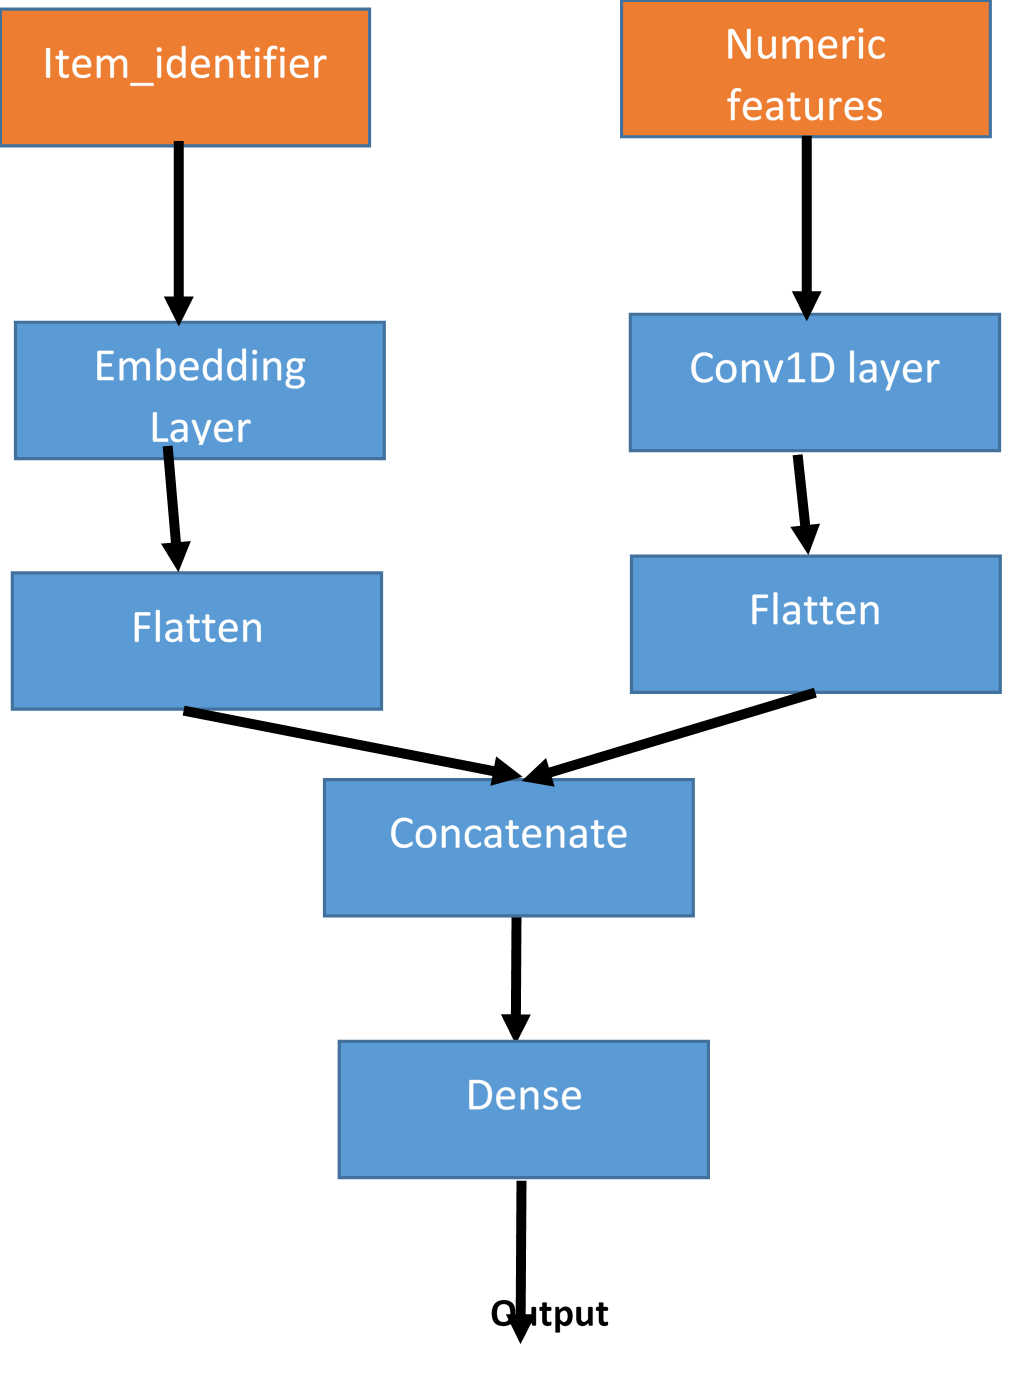

## Model

In [24]:
# 9.0 Two inputs:
input1 = tf.keras.Input(shape = (8,1))
input2 = tf.keras.Input(shape = (1,))

In [25]:
# 9.1
left = tf.keras.layers.Conv1D(32,3, activation = 'relu')(input1)
right =tf.keras.layers.Embedding(
                                input_dim = vocab_size,
                                 output_dim = 16
                                 )(input2)

In [26]:
# 9.2 Flatten and concatenate:
out = tf.keras.layers.concatenate([
                                    tf.keras.layers.Flatten()(left),
                                    tf.keras.layers.Flatten()(right)
                                   ])

In [27]:
# 10.0 Regression layer:
out = tf.keras.layers.Dense(32,activation = 'relu')(out)
out = tf.keras.layers.Dense(1, activation = 'sigmoid')(out)


In [28]:
# 10.1 Our model:
model = Model(inputs = [input1,input2], outputs = [out])

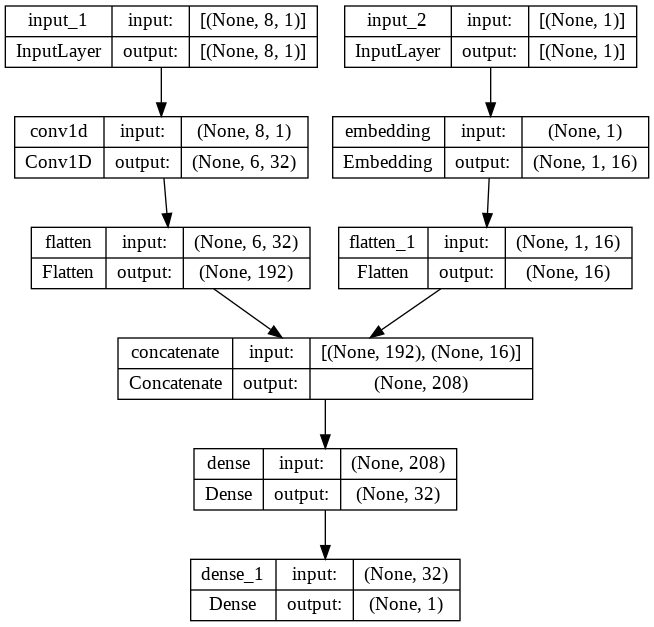

In [29]:
# 10.2 Plot model now:
plot_model(model, show_shapes= True)

In [31]:
# 11.0 Compile model
model.compile(
                 loss = "mean_squared_error",
                 optimizer='adam'
              )  

# 11.1 And fit:
history = model.fit(
                    [X,X1],
                    y,
                    epochs = 50,
                    validation_split = 0.2,
                    verbose = 1
                    )

Epoch 1/50
214/214 [==============================] - 1s 2ms/step - loss: 7659680.5000 - val_loss: 7689555.5000
Epoch 2/50
214/214 [==============================] - 0s 2ms/step - loss: 7659436.5000 - val_loss: 7689553.5000
Epoch 3/50
214/214 [==============================] - 0s 2ms/step - loss: 7659435.5000 - val_loss: 7689553.0000
Epoch 4/50
214/214 [==============================] - 0s 2ms/step - loss: 7659434.0000 - val_loss: 7689553.0000
Epoch 5/50
214/214 [==============================] - 0s 2ms/step - loss: 7659430.5000 - val_loss: 7689553.0000
Epoch 6/50
214/214 [==============================] - 0s 2ms/step - loss: 7659434.0000 - val_loss: 7689553.0000
Epoch 7/50
214/214 [==============================] - 0s 2ms/step - loss: 7659433.0000 - val_loss: 7689553.0000
Epoch 8/50
214/214 [==============================] - 0s 2ms/step - loss: 7659433.5000 - val_loss: 7689553.0000
Epoch 9/50
214/214 [==============================] - 0s 2ms/step - loss: 7659433.0000 - val_loss: 76895

In [ ]:
############## I am done ####################